In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv('features.csv')
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [5]:
df.set_index('Date', inplace=True)

In [14]:
monthly_temp = df['Temperature'].resample('ME').mean()
monthly_temp.dropna(inplace=True)

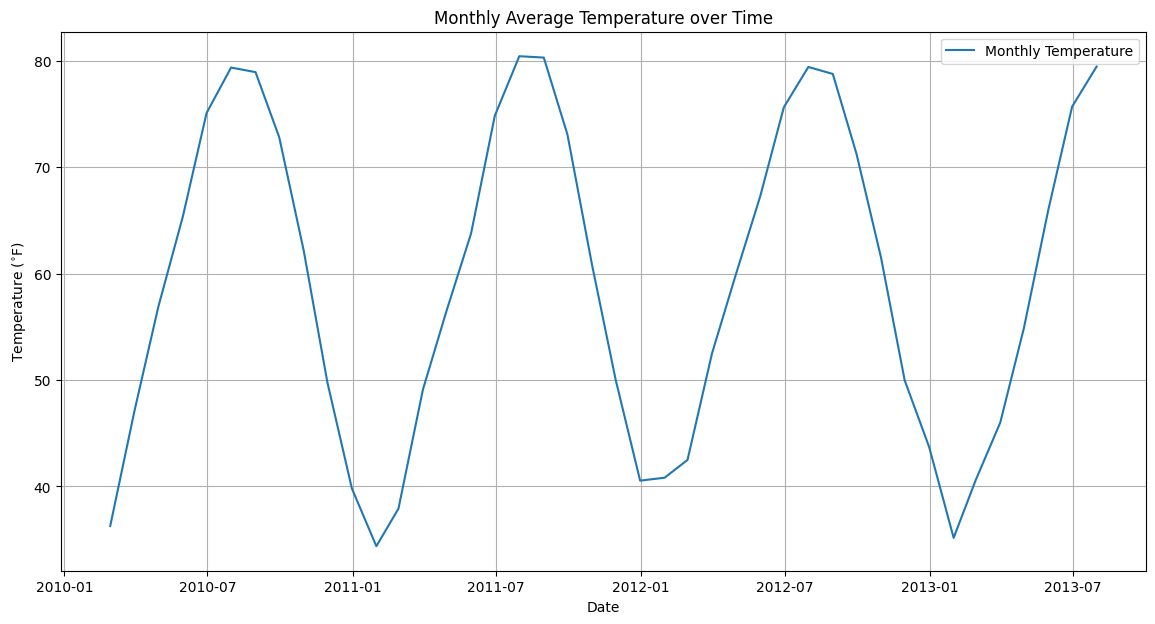

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_temp, label='Monthly Temperature')
plt.title('Monthly Average Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature ($^{\circ}$F)')
plt.legend()
plt.grid(True)
plt.savefig('monthly_temperature_plot.png')
plt.show()

In [8]:
decomposition = seasonal_decompose(monthly_temp, model='additive', period=12)
decomposition

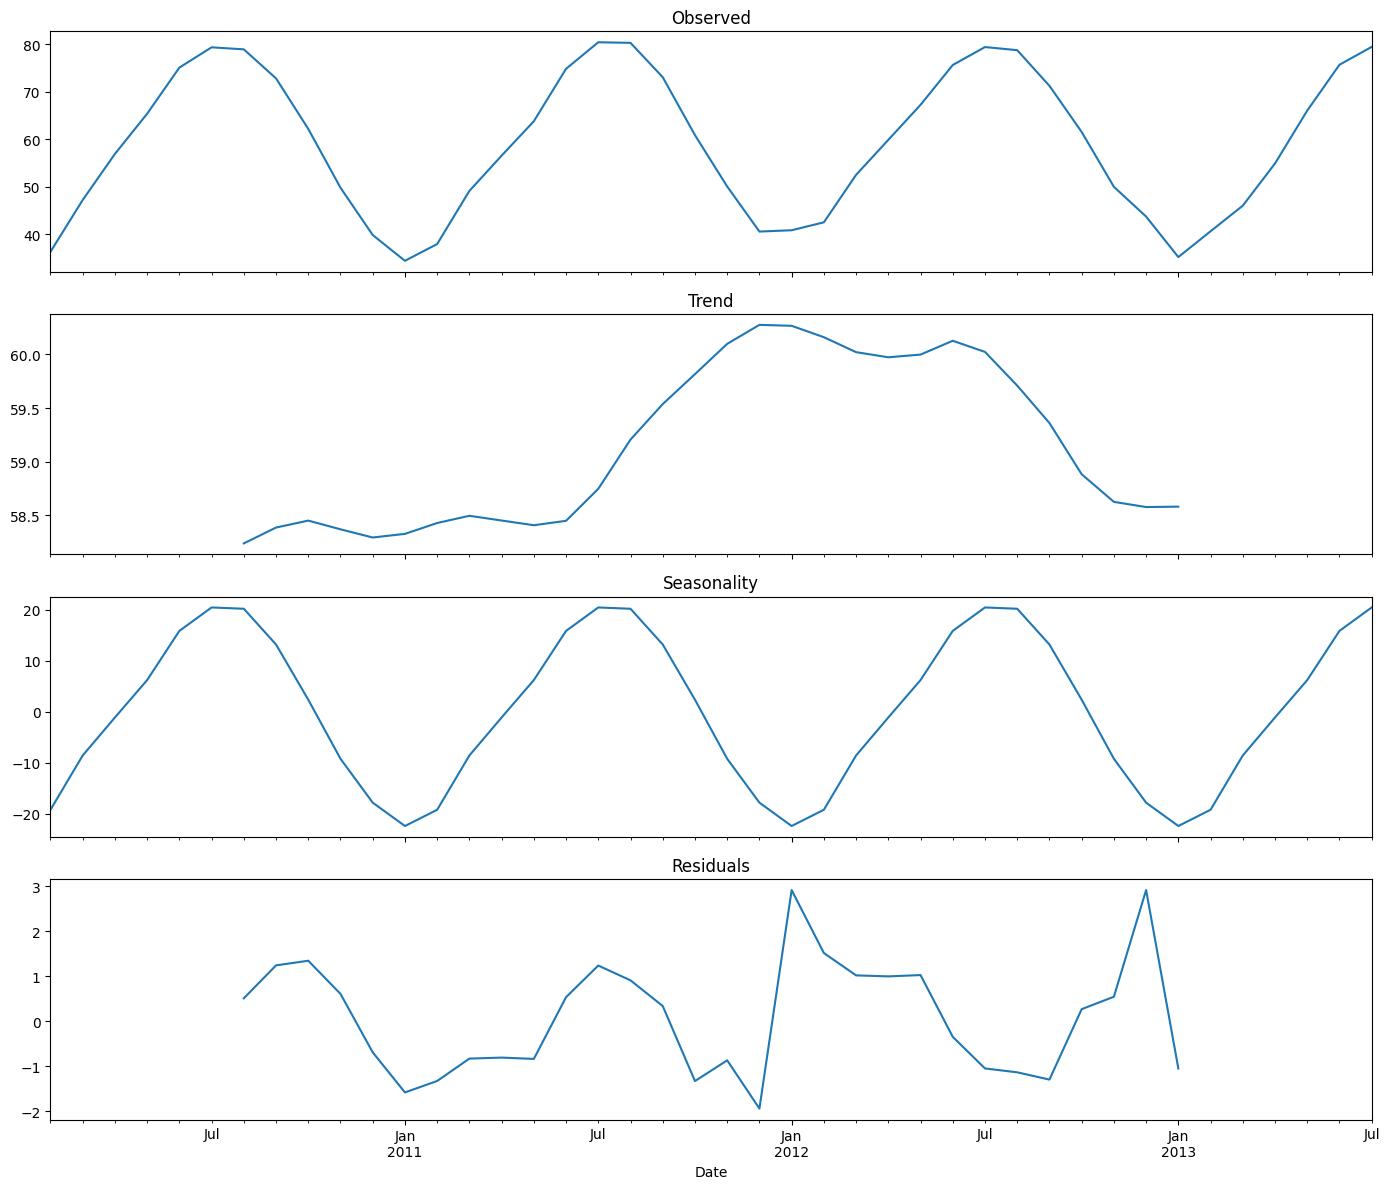

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonality')
decomposition.resid.plot(ax=ax4, title='Residuals')
plt.tight_layout()
plt.savefig('seasonal_decomposition_plot.png')
plt.show()

In [10]:
rolling_mean = monthly_temp.rolling(window=12).mean()

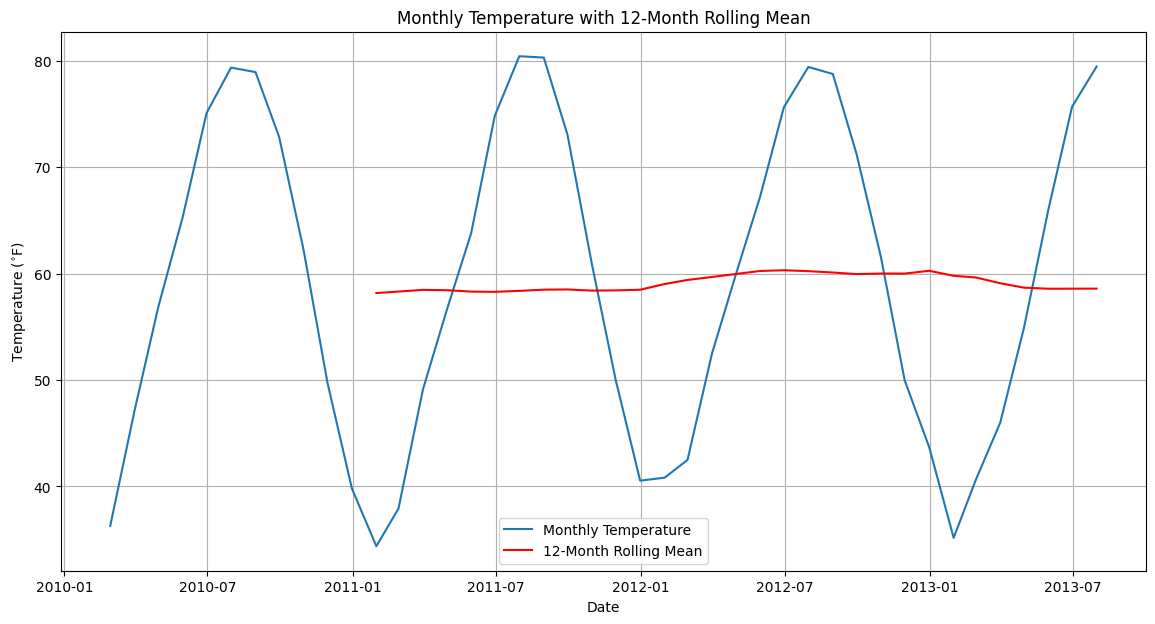

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_temp, label='Monthly Temperature')
plt.plot(rolling_mean, color='red', label='12-Month Rolling Mean')
plt.title('Monthly Temperature with 12-Month Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Temperature ($^{\circ}$F)')
plt.legend()
plt.grid(True)
plt.savefig('rolling_mean_plot.png')
plt.show()